## New Car Data

#### Data from December 2016, provided by [Cooper Union via Kaggle](https://www.kaggle.com/CooperUnion/cardataset), originally scraped from [Edmunds](https://www.edmunds.com) and [Twitter](https://www.twitter.com)

### Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
cars = pd.read_csv('./data/kaggledata.csv')

In [5]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [28]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


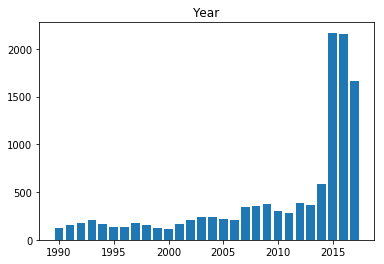

In [29]:
plt.bar(x=cars['Year'].value_counts().index,height=cars['Year'].value_counts())
plt.title("Year");

In [ ]:
pd.cut()